In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

world_cup_matches = pd.read_csv("C:\\Users\\ianfr\\Documents\\dev\\inteligencia-computacional\\dataset\\results.csv")
world_cup_matches['year'] = world_cup_matches['date'].str[:4].astype(int)
world_cup_matches['month'] = world_cup_matches['date'].str[5:7].astype(int)
world_cup_matches['day'] = world_cup_matches['date'].str[8:].astype(int)
world_cup_matches['neutral'] = world_cup_matches['neutral'].astype(int)
lista = world_cup_matches['tournament'].unique().tolist()
index = 0
lista_nova = []
for i in world_cup_matches['tournament']:
    if i == 'Friendly':
        lista_nova.append(1) 
    elif i == 'FIFA World Cup qualification':
        lista_nova.append(2.5)  
    elif i == 'Confederations Cup':
        lista_nova.append(3)  
    elif i == 'FIFA World Cup':
        lista_nova.append(4) 
    else:
        lista_nova.append(2) 
    index += 1
#print(lista)
world_cup_matches['game_weight'] = lista_nova
world_cup_matches = world_cup_matches[['home_team', 'home_score', 'away_score', 'away_team', 'year', 'month', 'day', 'tournament', 'neutral', 'game_weight']]
world_cup_matches = world_cup_matches[(world_cup_matches.year) >= 2014]
world_cup_matches = world_cup_matches[(world_cup_matches.year) <= 2018]
teams = ['Russia', 'Brazil', 'Australia', 'Iran', 'Japan', 'Saudi Arabia', 'South Korea', 'Egypt', 'Morocco', 'Nigeria', 'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 'Panama', 'Argentina', 'Colombia', 'Peru', 'Uruguay', 'Belgium', 'Croatia', 'Denmark', 'England', 'France', 'Germany', 'Iceland', 'Poland', 'Portugal', 'Serbia', 'Spain', 'Sweden', 'Switzerland']
teams.sort()
#world_cup_matches = world_cup_matches[world_cup_matches.home_team.isin(teams) | world_cup_matches.away_team.isin(teams)]
world_cup_matches.head()

,home_team,home_score,away_score,away_team,year,month,day,tournament,neutral,game_weight
35750,Kuwait,1,2,Jordan,2014,1,1,WAFF Championship,1,2.0
35751,Bahrain,0,1,Jordan,2014,1,4,WAFF Championship,1,2.0
35752,Namibia,0,1,Ghana,2014,1,4,Friendly,0,1.0
35753,Nigeria,2,1,Ethiopia,2014,1,4,Friendly,0,1.0
35754,Qatar,3,0,Kuwait,2014,1,4,WAFF Championship,0,2.0


In [113]:
world_cup_matches.describe()

,home_score,away_score,year,month,day,neutral,game_weight
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,1.553141,1.097153,2015.988481,7.146273,14.808085,0.295588,1.777657
std,1.541122,1.346297,1.384416,3.169644,8.781769,0.456356,0.690627
min,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,2015.000000,5.000000,7.000000,0.000000,1.000000
50%,1.000000,1.000000,2016.000000,7.000000,13.000000,0.000000,2.000000
75%,2.000000,2.000000,2017.000000,10.000000,23.000000,1.000000,2.000000
max,15.000000,20.000000,2018.000000,12.000000,31.000000,1.000000,4.000000


In [115]:
teams2 = world_cup_matches['home_team'].unique().tolist()
teams3 = world_cup_matches['away_team'].unique().tolist()
teams = list(set(teams2).union(set(teams3)))
data = {'Team': teams, 'GoalsScoredMean': [0 for i in range(len(teams))], 'GoalsConcededMean': [0 for i in range(len(teams))]}
stats = pd.DataFrame(data)
teams_att_power = []
teams_def_power = []
index = 0
for time in teams:
    team_goals = 0.0
    conceded_goals = 0.0
    team_matches = 0.0
    time_model = world_cup_matches[(world_cup_matches['home_team'] == time) | (world_cup_matches['away_team'] == time)]
    #print(time_model)
    for index, row in time_model.iterrows():
        if row['home_team'] == time:
            team_goals += row['home_score'] 
            conceded_goals += row['away_score'] 
        if row['away_team'] == time:
            team_goals += row['away_score'] 
            conceded_goals += row['home_score']
        team_matches += 1
    teams_att_power.append(team_goals/(team_matches))
    teams_def_power.append(conceded_goals/team_matches)
    index += 1
    stats.loc[stats['Team'] == time, 'GoalsScoredMean'] = team_goals/(team_matches)
    stats.loc[stats['Team'] == time, 'GoalsConcededMean'] = conceded_goals/(team_matches)
    
stats2 = stats.set_index('Team')
#print(stats2)
world_cup_matches['HomeAttack'] = [0.0 for i in range(len(world_cup_matches))]
world_cup_matches['HomeDefence'] = [0.0 for i in range(len(world_cup_matches))]
world_cup_matches['AwayAttack'] = [0.0 for i in range(len(world_cup_matches))]
world_cup_matches['AwayDefence'] = [0.0 for i in range(len(world_cup_matches))]

for index, row in world_cup_matches.iterrows():
    #if (row['home_team'] in teams and row['away_team'] in teams):
    world_cup_matches.loc[index,'HomeAttack'] = stats2.loc[row['home_team'], 'GoalsScoredMean']
    world_cup_matches.loc[index,'HomeDefence'] = stats2.loc[row['home_team'], 'GoalsConcededMean']
    world_cup_matches.loc[index,'AwayAttack'] = stats2.loc[row['away_team'], 'GoalsScoredMean']
    world_cup_matches.loc[index,'AwayDefence'] = stats2.loc[row['away_team'], 'GoalsConcededMean']
    #elif (row['home_team'] in teams and row['away_team'] not in teams):
    #    world_cup_matches.loc[index,'HomeAttack'] = stats2.loc[row['home_team'], 'GoalsScoredMean']
    #    world_cup_matches.loc[index,'HomeDefence'] = stats2.loc[row['home_team'], 'GoalsConcededMean']
    #else:
    #    world_cup_matches.loc[index,'AwayAttack'] = stats2.loc[row['away_team'], 'GoalsScoredMean']
    #    world_cup_matches.loc[index,'AwayDefence'] = stats2.loc[row['away_team'], 'GoalsConcededMean']
world_cup_matches.head()

,home_team,home_score,away_score,away_team,year,month,day,tournament,neutral,game_weight,HomeAttack,HomeDefence,AwayAttack,AwayDefence
35750,Kuwait,1,2,Jordan,2014,1,1,WAFF Championship,1,2.0,1.097561,1.414634,1.294118,0.911765
35751,Bahrain,0,1,Jordan,2014,1,4,WAFF Championship,1,2.0,1.237288,0.847458,1.294118,0.911765
35752,Namibia,0,1,Ghana,2014,1,4,Friendly,0,1.0,0.930233,0.953488,1.406250,0.859375
35753,Nigeria,2,1,Ethiopia,2014,1,4,Friendly,0,1.0,1.362319,0.942029,1.195652,1.543478
35754,Qatar,3,0,Kuwait,2014,1,4,WAFF Championship,0,2.0,1.693333,1.026667,1.097561,1.414634


In [117]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([world_cup_matches[['home_team','away_team', 'HomeAttack', 'HomeDefence', 'AwayAttack', 'AwayDefence', 'home_score']].rename(
            columns={'home_team':'team', 'away_team':'opponent', 'HomeAttack':'att', 'HomeDefence': 'defe', 'AwayAttack': 'away_att', 'AwayDefence': 'away_def','home_score':'goals'}),
           world_cup_matches[['away_team','home_team', 'AwayAttack', 'AwayDefence','HomeAttack', 'HomeDefence', 'away_score']].rename(
            columns={'away_team':'team', 'home_team':'opponent', 'AwayAttack':'att', 'AwayDefence': 'defe', 'HomeAttack': 'away_att', 'HomeDefence': 'away_def','away_score':'goals'})])
#print(goal_model_data)
poisson_model = smf.glm(formula="goals ~ att + defe + away_att + away_def", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 9202
Model:                            GLM   Df Residuals:                     9197
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13461.
Date:                Sat, 05 Oct 2019   Deviance:                       11836.
Time:                        19:00:32   Pearson chi2:                 1.06e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0434      0.044      0.995      0.320      -0.042       0.129
att            0.4850      0.019     25.345      0.000       0.447       0.522
defe          -0.1945      0.020     -9.806      0.000      -0.233      -0.156
away_att      -0.3335      0.023    -14.545      0.000      -0.378      -0.289
away_def       0.1664      0.007     23.907      0.000       0.153       0.180
==============================================================================
"""

In [118]:
def get_team_stats(team, return_df=False):
    #team_stats_df = player_overall_df[mask].head(no_of_players).groupby(groupby_cols).mean().round(0)
    #if return_df == True:
    #    return team_stats_df
    #else:
    #df = stats2[team]
    attack = stats2.loc[team, 'GoalsScoredMean']
    defence = stats2.loc[team, 'GoalsConcededMean']
    #year = world_cup_matches.loc[team, 'year']
    # print(attack, defence)
    return [attack, defence]

def simulate_goals(game, a_team='A Team', b_team='B Team', verbose=False):
    a_goals = 0
    b_goals = 0
    outcome = 0

    random_event = np.random.random()
    #print(random_event)
    counter = 0


    for index, row in pd.DataFrame(data=game).iterrows():
        for x in range(len(row)):
            counter += row[x]
            
            a_goals = index
            b_goals = x
            
            if counter > random_event:
                break
        if counter > random_event:
            break
    
    if verbose == True:
        print('Random float: {}'.format(random_event))
        print('{} goals: {}'.format(a_team, str(a_goals)))
        print('{} goals: {}\n'.format(b_team, str(b_goals)))
    
    return a_goals, b_goals


def show_game_summary(game, a_team='A Team', b_team='B Team', verbose=False):
    a_team_odds = np.sum(np.tril(game, -1))
    b_team_odds = np.sum(np.triu(game, 1))
    draw_odds = np.sum(np.diag(game))
    
    if verbose == True:
        print('{} chance of Win: {}%'.format(a_team, round(a_team_odds*100, 2)))
        print('{} chance of Win: {}%'.format(b_team, round(b_team_odds*100, 2)))
        print('Odds of a draw: {}%'.format(round(draw_odds*100, 2)))
    
    a_goals, b_goals = simulate_goals(game, a_team, b_team, verbose=verbose)
    
    return a_team_odds, b_team_odds, draw_odds, a_goals, b_goals


def team_preds(foot_model, a_team, b_team, max_goals=5, verbose=False):
    a_team_stats = get_team_stats(a_team)
    b_team_stats = get_team_stats(b_team)
    
    data1 = {'att': a_team_stats[0],
              'defe': a_team_stats[1],
              'away_att': b_team_stats[0], 
              'away_def': b_team_stats[1],
              }
    #print(data1)
    
    data2 = {'att': b_team_stats[0],
              'defe': b_team_stats[1],
              'away_att': a_team_stats[0], 
              'away_def': a_team_stats[1],
            }
    #print(data2)
        
    a_goals_avg = foot_model.predict(pd.DataFrame(data=data1, index=[1])).values[0]
    b_goals_avg = foot_model.predict(pd.DataFrame(data=data2, index=[1])).values[0]
    #print(a_goals_avg)
    #print(b_goals_avg)
    
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [a_goals_avg, b_goals_avg]]
    #print(max(team_pred[0]))
    #print(team_pred[1])
    #game = (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
    #print(game)
    #show_game_summary(game, a_team, b_team, verbose=verbose)
    return team_pred

def simulate_match(team_pred, foot_model, a_team, b_team, max_goals=5, verbose=False):
    game = (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
    show_game_summary(game, a_team, b_team, verbose=verbose)
    return game

In [119]:
team_pred = team_preds(poisson_model, 'Spain', 'Iran')
game = simulate_match(team_pred, poisson_model, 'Spain', 'Iran')
#pd.DataFrame(game)
show_game_summary(game, 'Spain', 'Iran', verbose=True)

Spain chance of Win: 49.73%
Iran chance of Win: 25.29%
Odds of a draw: 24.1%
Random float: 0.19185055050927902
Spain goals: 1
Iran goals: 0



(0.4973148091682119, 0.25289690915200574, 0.24095230832213546, 1, 0)

In [120]:
pd.DataFrame(game)

,0,1,2,3,4,5
0,0.059911,0.067486,0.038009,0.014271,0.004019,0.000905
1,0.101158,0.113947,0.064176,0.024097,0.006786,0.001529
2,0.085401,0.096198,0.054180,0.020343,0.005729,0.001291
3,0.048066,0.054142,0.030494,0.011450,0.003224,0.000726
4,0.020289,0.022854,0.012872,0.004833,0.001361,0.000307
5,0.006852,0.007718,0.004347,0.001632,0.000460,0.000104


In [121]:
goal_model_data.head()

,team,opponent,att,defe,away_att,away_def,goals
35750,Kuwait,Jordan,1.097561,1.414634,1.294118,0.911765,1
35751,Bahrain,Jordan,1.237288,0.847458,1.294118,0.911765,0
35752,Namibia,Ghana,0.930233,0.953488,1.406250,0.859375,0
35753,Nigeria,Ethiopia,1.362319,0.942029,1.195652,1.543478,2
35754,Qatar,Kuwait,1.693333,1.026667,1.097561,1.414634,3


In [122]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

def model_metrics(team_preds, dataframe, poisson_model):
    yreal = []
    ypred = []
    team_pred = []
    i = 0
    for index, row in dataframe.iterrows():
        team_pred = team_preds(poisson_model, row['team'], row['opponent'])
        #print(team_pred)
        yreal.append(row['goals'])
        ypred.append(team_pred[0].index(max(team_pred[0])))
    #print(yreal)
    #print(ypred)
    rms = math.sqrt(mean_squared_error(yreal, ypred))
    r2 = r2_score(yreal, ypred)
    return rms, r2

metrics = model_metrics(team_preds, goal_model_data, poisson_model)

In [123]:
print(metrics)

(1.4075895748459326, 0.0764474312313318)


In [124]:
team_pred = team_preds(poisson_model, 'Brazil', 'Argentina')
print(team_pred[1])
game = simulate_match(team_pred, poisson_model, 'Brazil', 'Argentina')
#pd.DataFrame(game)
show_game_summary(game, 'Brazil', 'Argentina', verbose=True)

[0.3183811761923557, 0.3643891494881003, 0.2085227742616919, 0.07955185172569197, 0.02276189184392519, 0.005210224114968998]
Brazil chance of Win: 47.82%
Argentina chance of Win: 26.78%
Odds of a draw: 24.64%
Random float: 0.9405707336467884
Brazil goals: 4
Argentina goals: 1



(0.478189217394269, 0.26782869021672445, 0.24637300828890307, 4, 1)

In [125]:
pd.DataFrame(game)

,0,1,2,3,4,5
0,0.062894,0.071983,0.041192,0.015715,0.004496,0.001029
1,0.102002,0.116741,0.066806,0.025486,0.007292,0.001669
2,0.082713,0.094665,0.054172,0.020667,0.005913,0.001354
3,0.044714,0.051176,0.029286,0.011172,0.003197,0.000732
4,0.018129,0.020749,0.011874,0.004530,0.001296,0.000297
5,0.005880,0.006730,0.003851,0.001469,0.000420,0.000096


In [126]:
from sklearn.model_selection import train_test_split

final = pd.get_dummies(goal_model_data, prefix=['team', 'opponent'], columns=['team', 'opponent'])
x = final.drop(['goals'], axis=1)
y = final['goals']
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [127]:
from patsy import dmatrices

mask = np.random.rand(len(goal_model_data)) < 0.8
df_train = goal_model_data[mask]
df_test = goal_model_data[~mask]
expr = """goals ~ att + defe + away_att + away_def"""
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_train)
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  goals   No. Observations:                 7320
Model:                            GLM   Df Residuals:                     7315
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10601.
Date:                Sat, 05 Oct 2019   Deviance:                       9191.9
Time:                        19:04:06   Pearson chi2:                 8.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0709      0.050     -1.431      0.1

In [128]:
poisson_test_results = sm.GLM(y_test, X_test, family=sm.families.Poisson()).fit()
#print(poisson_test_results.summary())
poisson_predictions = poisson_test_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()
#print(predictions_summary_frame)

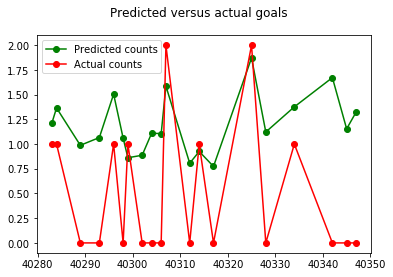

In [129]:
predicted_counts=predictions_summary_frame['mean'][-20:]
actual_counts = y_test['goals'][-20:]
fig = plt.figure()
fig.suptitle('Predicted versus actual goals')
predicted, = plt.plot(X_test.index[-20:], predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index[-20:], actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [130]:
poisson_test_results = sm.GLM(y_test, X_test, family=sm.families.Poisson()).fit()
print(poisson_test_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  goals   No. Observations:                 1882
Model:                            GLM   Df Residuals:                     1877
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2809.7
Date:                Sat, 05 Oct 2019   Deviance:                       2543.0
Time:                        19:04:07   Pearson chi2:                 2.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1361      0.094      1.444      0.1

In [131]:
poisson_predictions = poisson_test_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

           mean   mean_se  mean_ci_lower  mean_ci_upper
35751  1.253230  0.034905       1.186650       1.323545
35754  1.689562  0.042533       1.608222       1.775015
35757  1.601155  0.048881       1.508161       1.699884
35764  1.646270  0.045556       1.559360       1.738023
35768  1.383576  0.035533       1.315656       1.455003
35769  0.966209  0.031656       0.906114       1.030290
35771  1.162097  0.029376       1.105924       1.221124
35791  1.596966  0.051316       1.499492       1.700778
35792  1.174155  0.036161       1.105378       1.247212
35793  1.263613  0.037543       1.192133       1.339380
35796  1.574955  0.043374       1.492198       1.662302
35800  1.373253  0.034250       1.307739       1.442048
35802  1.541765  0.043123       1.459520       1.628643
35808  1.892316  0.078774       1.744051       2.053184
35814  1.413074  0.048215       1.321666       1.510805
35821  1.538859  0.045803       1.451655       1.631301
35823  2.026943  0.078891       1.878069       2

In [132]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, BayesianRidge
final = pd.get_dummies(goal_model_data, prefix=['team', 'opponent'], columns=['team', 'opponent'])
x = final.drop(['goals'], axis=1)
y = final['goals']
y = y.astype('int')
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = BayesianRidge()
scoring = 'r2'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(results.mean())

0.2700962138970383


In [133]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge
final = pd.get_dummies(goal_model_data, prefix=['team', 'opponent'], columns=['team', 'opponent'])
x = final.drop(['goals'], axis=1)
y = final['goals']
y = y.astype('int')
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = BayesianRidge()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(math.sqrt(abs(results.mean())))

1.2278420344939502


In [134]:
final_df = goal_model_data
#print(final_df)
final_df['predicted'] = [0 for i in range(len(goal_model_data))]

def test_accuracy(model, dataframe, team_preds):
    for index, row in dataframe.iterrows():
        #print(dataframe)
        team_pred = team_preds(model, row['team'], row['opponent'])
        #print(row['team'])
        #print(row['opponent'])
        #print(row['year'])
        #print(type(row['year']))
        #print(team_pred)
        #row['predicted'] = team_pred[0].index(max(team_pred[0]))
        #print(team_pred[0].index(max(team_pred[0])))
        #dataframe['predicted'] = team_pred[0].index(max(team_pred[0]))
        dataframe.loc[index, 'predicted'] = team_pred[0].index(max(team_pred[0]))
    
    #print(dataframe)
    count = 0
    for index, row in dataframe.iterrows():
        if row['predicted'] == row['goals']:
            #print("count")
            count += 1
    print('Poisson Model: {}% accurate'.format(round(count / len(dataframe), 2)*100))

test_accuracy(poisson_model, final_df, team_preds)

Poisson Model: 33.0% accurate


In [135]:
count = 0
for index, row in final_df.iterrows():
        if row['predicted'] == row['goals']:
            count += 1

print(count)
print(len(final_df))
print(float(count) / len(final_df))

3036
9202
0.32992827646163875


In [136]:
final_df.head()

,team,opponent,att,defe,away_att,away_def,goals,predicted
35750,Kuwait,Jordan,1.097561,1.414634,1.294118,0.911765,1,1
35751,Bahrain,Jordan,1.237288,0.847458,1.294118,0.911765,0,1
35752,Namibia,Ghana,0.930233,0.953488,1.406250,0.859375,0,1
35753,Nigeria,Ethiopia,1.362319,0.942029,1.195652,1.543478,2,1
35754,Qatar,Kuwait,1.693333,1.026667,1.097561,1.414634,3,0
